In [74]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from scipy.integrate import quad
import random

In [75]:
def f(x):
    return np.exp(- x**4 /2)


In [76]:
z = quad(f, -2, 2)
print("Valor de Z =",z[0], "Error=",z[1])

Valor de Z = 2.155761894254074 Error= 5.756349948930969e-14


In [77]:
N=10e7
print("N=",N)
M = 4.0
data=[]
n = 0
rej=0
x_min=-2.0
x_max=2.0
L= x_max - x_min

N= 100000000.0


In [78]:
#Montecarlo 
while len(data) <N:
    n +=1
    x = x_min + L*random.random()
    u = random.random()
    if u < f(x)*L/M:
        data.append(x)
    else:
        rej +=1

In [79]:
#Cantidad de Rechazos
rechazos = rej*100/n
print("rechazos = ",rechazos, "%")

rechazos =  46.1047917302675 %


In [82]:
# Estimar <x**2>
data = np.array(data)
valor_medio=np.mean(data**2)
a_valor_medio = quad(lambda x: x**2 * f(x) / z[0], -2, 2)
error = abs(valor_medio - a_valor_medio[0] )/ a_valor_medio[0] *100
print("Analítico de <x**2> =", a_valor_medio[0])
print("montecarlo de <x**2> =", valor_medio)
print("Error =", error)



Analítico de <x**2> = 0.4779216916104081
montecarlo de <x**2> = 0.4779198419740644
Error = 0.00038701661300737827


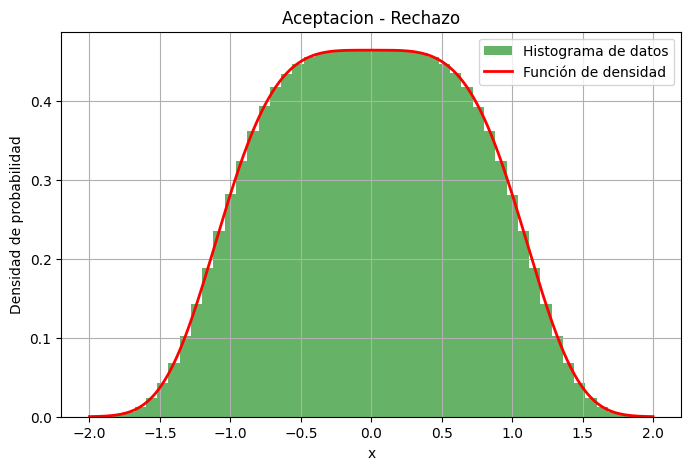

In [81]:
#Graficos
plt.figure(figsize=(8,5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Histograma de datos')
x_plot= np.linspace(-2,2,500)
pdf_plot= np.exp(-(x_plot**4)/  2) / z[0]
plt.plot(x_plot, pdf_plot, 'r-', lw=2, label='Función de densidad')
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.title("Aceptacion - Rechazo")
plt.legend()
plt.grid()
plt.show()
